# IOzone Analysis

In [2]:
# importing packages

import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

In [3]:
# dataframes initialization

csv_folder = "../csv"
c1_np_file_path = f"{csv_folder}/iozone_test-c1.csv"
c1_p_file_path = f"{csv_folder}/iozone_test-c1-pinning.csv"
c2_np_file_path = f"{csv_folder}/iozone_test-c2.csv"
c2_p_file_path = f"{csv_folder}/iozone_test-c2-pinning.csv"
vm1_file_path = f"{csv_folder}/iozone_test-vm1.csv"
vm2_file_path = f"{csv_folder}/iozone_test-vm2.csv"
vm_nfs_file_path = f"{csv_folder}/iozone-nfs_test-vm.csv"

c1_np_df = pd.read_csv(c1_np_file_path)
c1_p_df = pd.read_csv(c1_p_file_path)
c2_np_df = pd.read_csv(c2_np_file_path)
c2_p_df = pd.read_csv(c2_p_file_path)
vm1_df = pd.read_csv(vm1_file_path)
vm2_np_df = pd.read_csv(vm2_file_path)
vm_nfs_df = pd.read_csv(vm_nfs_file_path)

c1_np_df = c1_np_df.drop(columns=['Run'])
c1_p_df = c1_p_df.drop(columns=['Run'])
c2_np_df = c2_np_df.drop(columns=['Run'])
c2_p_df = c2_p_df.drop(columns=['Run'])
vm1_df = vm1_df.drop(columns=['Run'])
vm2_df = vm2_np_df.drop(columns=['Run'])
vm_nfs_df = vm_nfs_df.drop(columns=['Run'])


c1_np_df = c1_np_df.groupby(["Size (kB)", "Record Length"]).agg(['mean', 'std']).reset_index()
c1_p_df = c1_p_df.groupby(["Size (kB)", "Record Length"]).agg(['mean', 'std']).reset_index()
c2_np_df = c2_np_df.groupby(["Size (kB)", "Record Length"]).agg(['mean', 'std']).reset_index()
c2_p_df = c2_p_df.groupby(["Size (kB)", "Record Length"]).agg(['mean', 'std']).reset_index()
vm1_df = vm1_df.groupby(["Size (kB)", "Record Length"]).agg(['mean', 'std']).reset_index()
vm2_df = vm2_df.groupby(["Size (kB)", "Record Length"]).agg(['mean', 'std']).reset_index()
vm_nfs_df = vm_nfs_df.groupby(["Size (kB)", "Record Length"]).agg(['mean', 'std']).reset_index()

In [4]:
# showing df format
c1_p_df.head()

Size (kB) Record Length Write (kB/s)               Rewrite (kB/s)  \
                                  mean           std           mean   
0        64             4    2204016.0  3.627799e+05      5196093.0   
1        64             8    3529064.0  1.057802e+06      8606935.2   
2        64            16    4463475.8  1.628420e+06     11440824.6   
3        64            32    5405718.8  1.085887e+06     12240564.8   
4        64            64    6146095.4  1.357606e+06     12137843.0   

                Read (kB/s)               Reread (kB/s)                \
            std        mean           std          mean           std   
0  9.476463e+05   8986091.6  3.317745e+06    10360887.2  1.859145e+06   
1  1.562251e+06  17095380.2  4.561184e+06    16740260.2  4.052853e+06   
2  3.739506e+06  22649829.2  6.909237e+06    22223871.0  5.262064e+06   
3  3.768845e+06  32886347.0  1.397225e+07    28237611.0  6.830212e+06   
4  3.816292e+06  49746350.6  1.620599e+07    48117904.2  1.476025e+07   

  Random Read (kB/s)               Random Write (kB/s)                
                mean           std                mean           std  
0          6908499.0  1.323365e+06           4982912.8  9.256070e+05  
1         11985950.6  1.263107e+06           8368631.0  2.176492e+06  
2         16637796.8  4.791978e+06          11493675.0  3.149148e+06  
3         22942215.6  9.236142e+06          12770379.4  3.368059e+06  
4         32105268.8  1.397636e+07          17293455.2  4.703034e+06

## Comparison between VMs

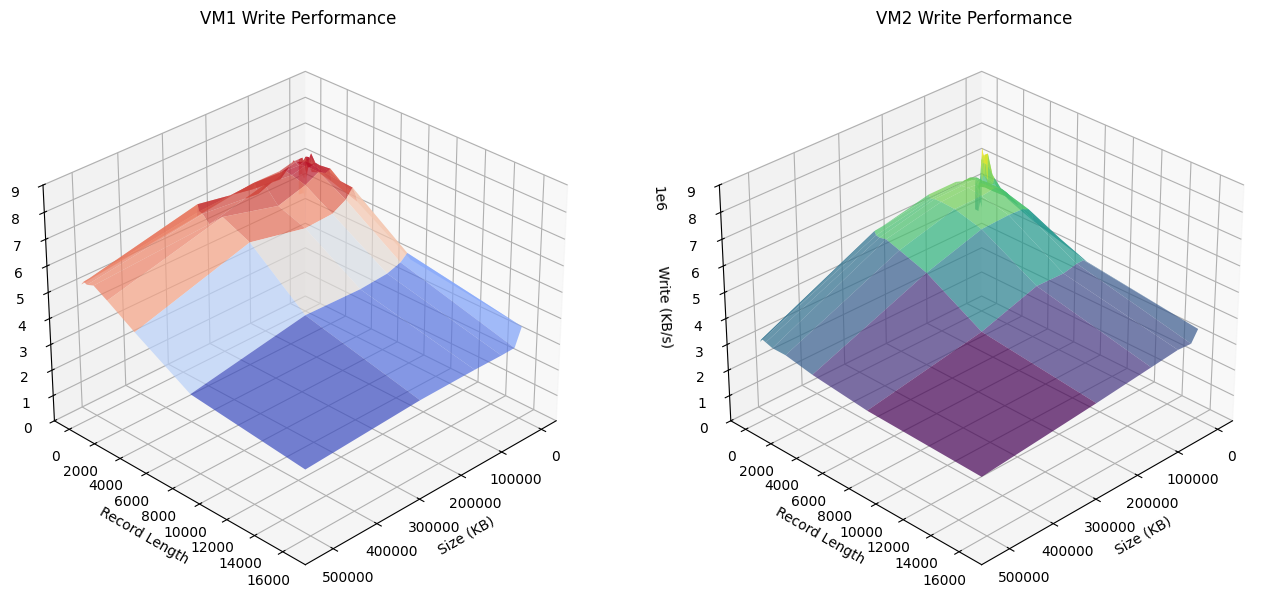

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': '3d'})

# For vm1_df:
sizes_vm1 = np.sort(vm1_df["Size (kB)"].unique())
record_lengths_vm1 = np.sort(vm1_df["Record Length"].unique())
X1, Y1 = np.meshgrid(sizes_vm1, record_lengths_vm1)
Z1 = np.empty(X1.shape)

for i, rec in enumerate(record_lengths_vm1):
  for j, size in enumerate(sizes_vm1):
    matching = vm1_df[(vm1_df["Record Length"] == rec) & (vm1_df["Size (kB)"] == size)]
    if not matching.empty:
      Z1[i, j] = matching[("Write (kB/s)", "mean")].values[0]
    else:
      Z1[i, j] = np.nan

surf1 = ax1.plot_surface(X1, Y1, Z1, cmap=cm.coolwarm, alpha=0.7)
ax1.set_xlabel('Size (KB)')
ax1.set_ylabel('Record Length')
ax1.set_zlabel('Write (KB/s)')
ax1.set_title('VM1 Write Performance')

# For vm2_df:
sizes_vm2 = np.sort(vm2_df["Size (kB)"].unique())
record_lengths_vm2 = np.sort(vm2_df["Record Length"].unique())
X2, Y2 = np.meshgrid(sizes_vm2, record_lengths_vm2)
Z2 = np.empty(X2.shape)

for i, rec in enumerate(record_lengths_vm2):
  for j, size in enumerate(sizes_vm2):
    matching = vm2_df[(vm2_df["Record Length"] == rec) & (vm2_df["Size (kB)"] == size)]
    if not matching.empty:
      Z2[i, j] = matching[("Write (kB/s)", "mean")].values[0]
    else:
      Z2[i, j] = np.nan

surf2 = ax2.plot_surface(X2, Y2, Z2, cmap=cm.viridis, alpha=0.7)
ax2.set_xlabel('Size (KB)')
ax2.set_ylabel('Record Length')
ax2.set_zlabel('Write (KB/s)')
ax2.set_title('VM2 Write Performance')
ax1.view_init(elev=30, azim=45)
ax2.view_init(elev=30, azim=45)

for ax in [ax1, ax2]:
  ax.set_zlim([0, 9 * 1e6])

plt.show()


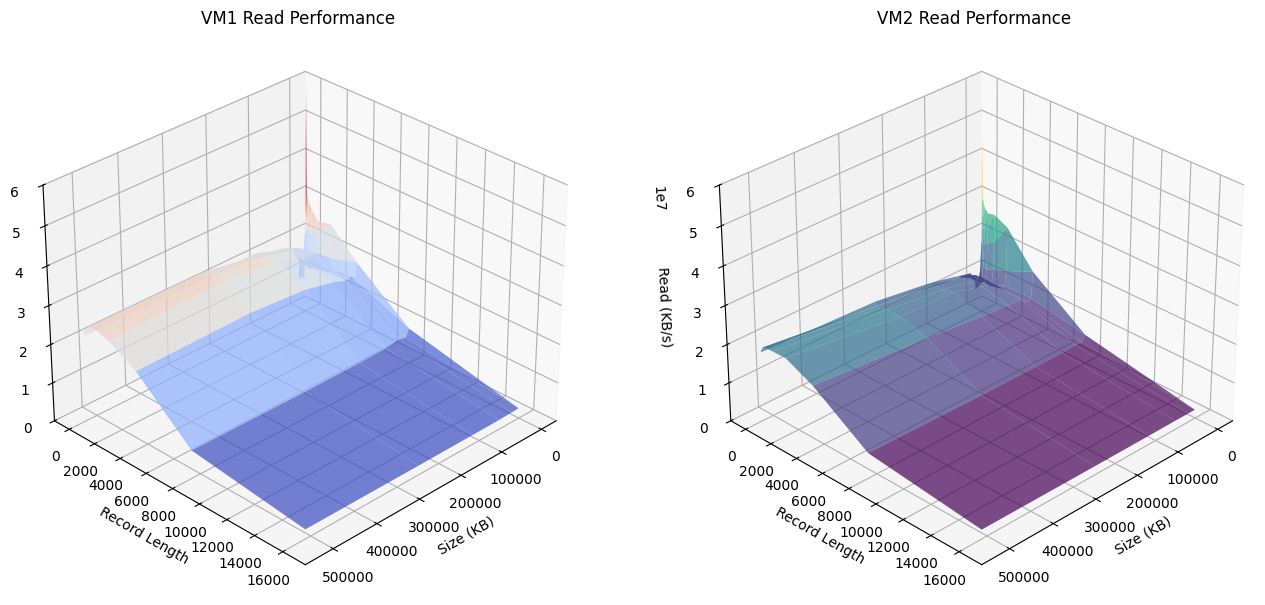

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': '3d'})

# For vm1_df:
sizes_vm1 = np.sort(vm1_df["Size (kB)"].unique())
record_lengths_vm1 = np.sort(vm1_df["Record Length"].unique())
X1, Y1 = np.meshgrid(sizes_vm1, record_lengths_vm1)
Z1 = np.empty(X1.shape)

for i, rec in enumerate(record_lengths_vm1):
  for j, size in enumerate(sizes_vm1):
    matching = vm1_df[(vm1_df["Record Length"] == rec) & (vm1_df["Size (kB)"] == size)]
    if not matching.empty:
      Z1[i, j] = matching[("Read (kB/s)", "mean")].values[0]
    else:
      Z1[i, j] = np.nan

surf1 = ax1.plot_surface(X1, Y1, Z1, cmap=cm.coolwarm, alpha=0.7)
ax1.set_xlabel('Size (KB)')
ax1.set_ylabel('Record Length')
ax1.set_zlabel('Read (KB/s)')
ax1.set_title('VM1 Read Performance')

# For vm2_df:
sizes_vm2 = np.sort(vm2_df["Size (kB)"].unique())
record_lengths_vm2 = np.sort(vm2_df["Record Length"].unique())
X2, Y2 = np.meshgrid(sizes_vm2, record_lengths_vm2)
Z2 = np.empty(X2.shape)

for i, rec in enumerate(record_lengths_vm2):
  for j, size in enumerate(sizes_vm2):
    matching = vm2_df[(vm2_df["Record Length"] == rec) & (vm2_df["Size (kB)"] == size)]
    if not matching.empty:
      Z2[i, j] = matching[("Read (kB/s)", "mean")].values[0]
    else:
      Z2[i, j] = np.nan

surf2 = ax2.plot_surface(X2, Y2, Z2, cmap=cm.viridis, alpha=0.7)
ax2.set_xlabel('Size (KB)')
ax2.set_ylabel('Record Length')
ax2.set_zlabel('Read (KB/s)')
ax2.set_title('VM2 Read Performance')
ax1.view_init(elev=30, azim=45)
ax2.view_init(elev=30, azim=45)

for ax in [ax1, ax2]:
  ax.set_zlim([0, 6e7])

plt.show()


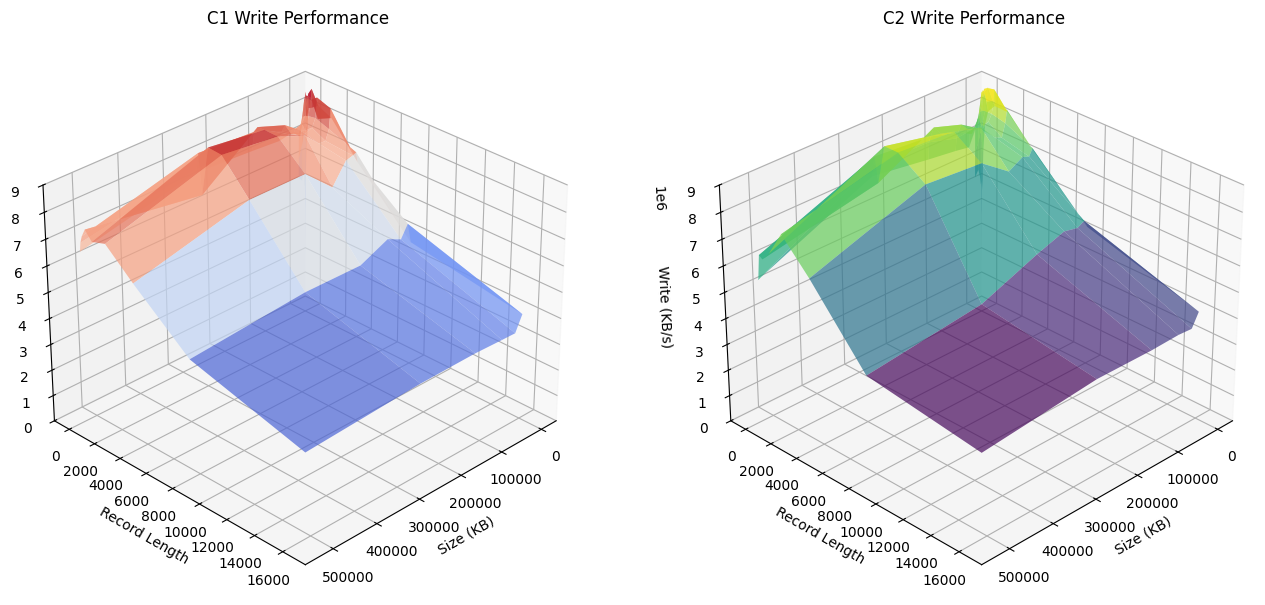

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': '3d'})

# For c1_np_df:
sizes_c1 = np.sort(c1_np_df["Size (kB)"].unique())
record_lengths_c1 = np.sort(c1_np_df["Record Length"].unique())
X1, Y1 = np.meshgrid(sizes_c1, record_lengths_c1)
Z1 = np.empty(X1.shape)

for i, rec in enumerate(record_lengths_c1):
  for j, size in enumerate(sizes_c1):
    matching = c1_np_df[(c1_np_df["Record Length"] == rec) & (c1_np_df["Size (kB)"] == size)]
    if not matching.empty:
      Z1[i, j] = matching[("Write (kB/s)", "mean")].values[0]
    else:
      Z1[i, j] = np.nan

surf1 = ax1.plot_surface(X1, Y1, Z1, cmap=cm.coolwarm, alpha=0.7)
ax1.set_xlabel('Size (KB)')
ax1.set_ylabel('Record Length')
ax1.set_zlabel('Write (KB/s)')
ax1.set_title('C1 Write Performance')

# For c2_np_df:
sizes_c2 = np.sort(c2_np_df["Size (kB)"].unique())
record_lengths_c2 = np.sort(c2_np_df["Record Length"].unique())
X2, Y2 = np.meshgrid(sizes_c2, record_lengths_c2)
Z2 = np.empty(X2.shape)

for i, rec in enumerate(record_lengths_c2):
  for j, size in enumerate(sizes_c2):
    matching = c2_np_df[(c2_np_df["Record Length"] == rec) & (c2_np_df["Size (kB)"] == size)]
    if not matching.empty:
      Z2[i, j] = matching[("Write (kB/s)", "mean")].values[0]
    else:
      Z2[i, j] = np.nan

surf2 = ax2.plot_surface(X2, Y2, Z2, cmap=cm.viridis, alpha=0.7)
ax2.set_xlabel('Size (KB)')
ax2.set_ylabel('Record Length')
ax2.set_zlabel('Write (KB/s)')
ax2.set_title('C2 Write Performance')
ax1.view_init(elev=30, azim=45)
ax2.view_init(elev=30, azim=45)

for ax in [ax1, ax2]:
  ax.set_zlim([0, 9 * 1e6])

plt.show()


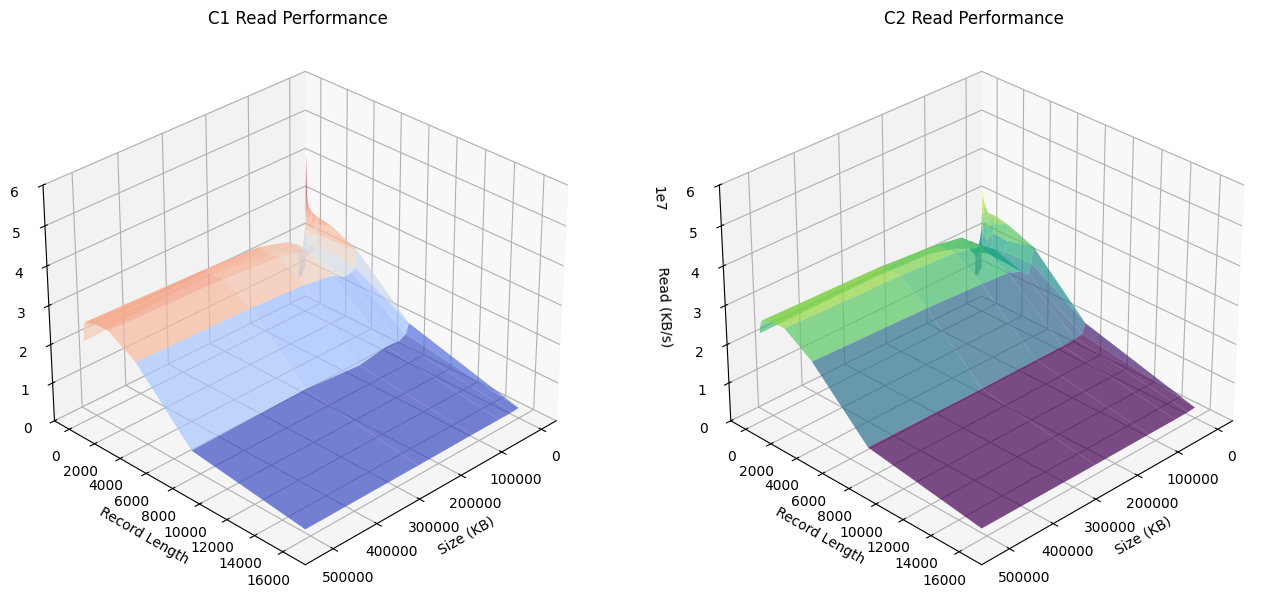

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': '3d'})

# For c1_np_df:
sizes_c1 = np.sort(c1_np_df["Size (kB)"].unique())
record_lengths_c1 = np.sort(c1_np_df["Record Length"].unique())
X1, Y1 = np.meshgrid(sizes_c1, record_lengths_c1)
Z1 = np.empty(X1.shape)

for i, rec in enumerate(record_lengths_c1):
  for j, size in enumerate(sizes_c1):
    matching = c1_np_df[(c1_np_df["Record Length"] == rec) & (c1_np_df["Size (kB)"] == size)]
    if not matching.empty:
      Z1[i, j] = matching[("Read (kB/s)", "mean")].values[0]
    else:
      Z1[i, j] = np.nan

surf1 = ax1.plot_surface(X1, Y1, Z1, cmap=cm.coolwarm, alpha=0.7)
ax1.set_xlabel('Size (KB)')
ax1.set_ylabel('Record Length')
ax1.set_zlabel('Read (KB/s)')
ax1.set_title('C1 Read Performance')

# For c2_np_df:
sizes_c2 = np.sort(c2_np_df["Size (kB)"].unique())
record_lengths_c2 = np.sort(c2_np_df["Record Length"].unique())
X2, Y2 = np.meshgrid(sizes_c2, record_lengths_c2)
Z2 = np.empty(X2.shape)

for i, rec in enumerate(record_lengths_c2):
  for j, size in enumerate(sizes_c2):
    matching = c2_np_df[(c2_np_df["Record Length"] == rec) & (c2_np_df["Size (kB)"] == size)]
    if not matching.empty:
      Z2[i, j] = matching[("Read (kB/s)", "mean")].values[0]
    else:
      Z2[i, j] = np.nan

surf2 = ax2.plot_surface(X2, Y2, Z2, cmap=cm.viridis, alpha=0.7)
ax2.set_xlabel('Size (KB)')
ax2.set_ylabel('Record Length')
ax2.set_zlabel('Read (KB/s)')
ax2.set_title('C2 Read Performance')
ax1.view_init(elev=30, azim=45)
ax2.view_init(elev=30, azim=45)

for ax in [ax1, ax2]:
  ax.set_zlim([0, 6e7])

plt.show()


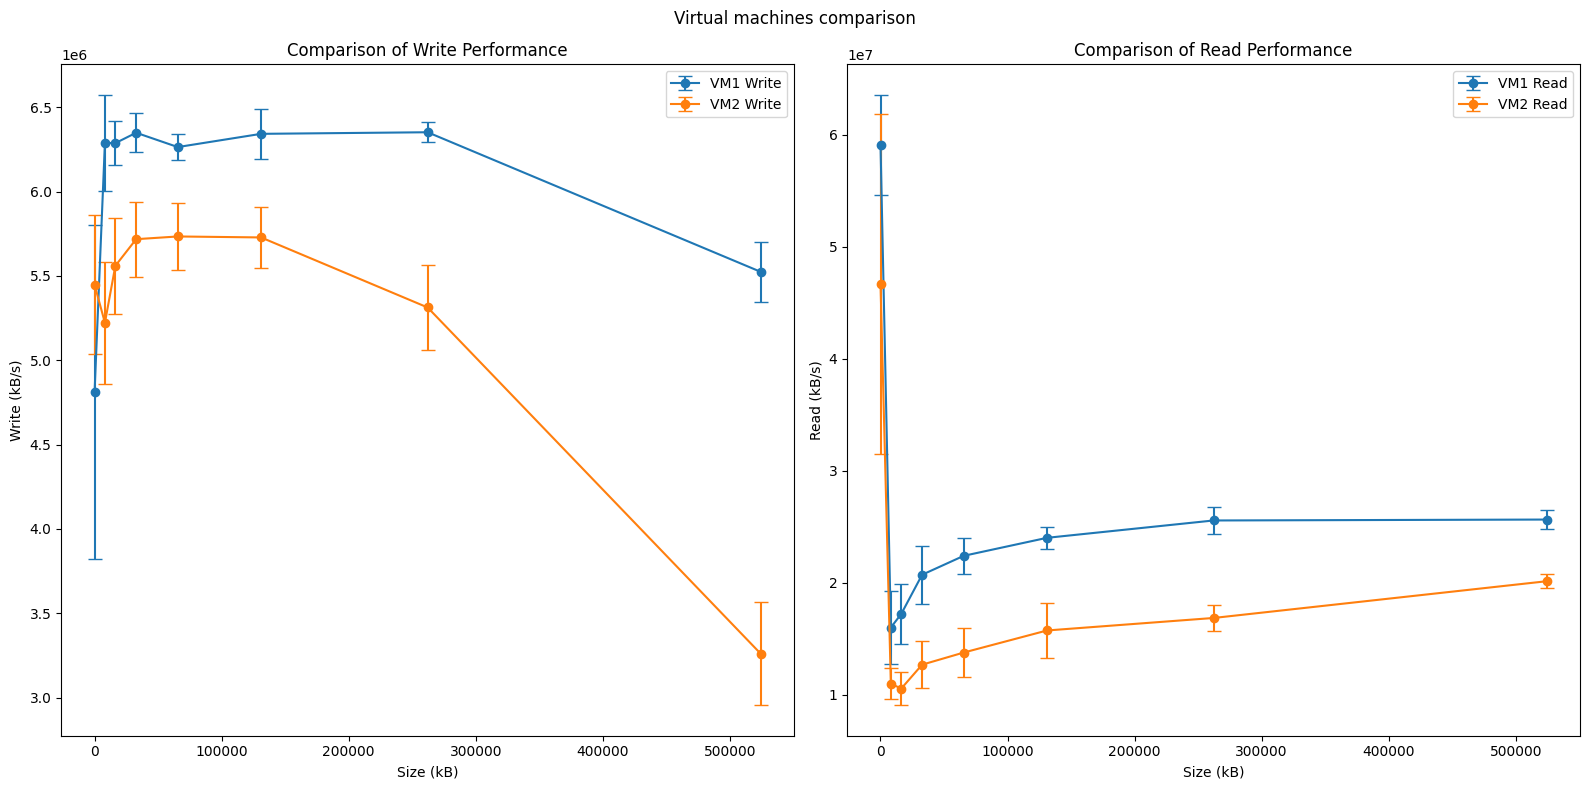

In [9]:
unique_size_n = len(vm1_df['Size (kB)'].unique())

filtered_vm1_df = vm1_df[~vm1_df[('Size (kB)', '')].isin([128, 256, 512, 1024, 2048, 4096])]
filtered_vm2_df = vm2_df[~vm2_df[('Size (kB)', '')].isin([128, 256, 512, 1024, 2048, 4096])]

best_write_vm1 = filtered_vm1_df.loc[filtered_vm1_df.groupby(['Size (kB)'])[[('Write (kB/s)', 'mean')]].idxmax().values.reshape(len(filtered_vm1_df['Size (kB)'].unique()))]
best_read_vm1 = filtered_vm1_df.loc[filtered_vm1_df.groupby(['Size (kB)'])[[('Read (kB/s)', 'mean')]].idxmax().values.reshape(len(filtered_vm1_df['Size (kB)'].unique()))]
best_write_vm2 = filtered_vm2_df.loc[filtered_vm2_df.groupby(['Size (kB)'])[[('Write (kB/s)', 'mean')]].idxmax().values.reshape(len(filtered_vm2_df['Size (kB)'].unique()))]
best_read_vm2 = filtered_vm2_df.loc[filtered_vm2_df.groupby(['Size (kB)'])[[('Read (kB/s)', 'mean')]].idxmax().values.reshape(len(filtered_vm2_df['Size (kB)'].unique()))]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("Virtual machines comparison")

ax1.errorbar(best_write_vm1[('Size (kB)', '')], best_write_vm1[('Write (kB/s)', 'mean')], yerr=best_write_vm1[('Write (kB/s)', 'std')], label='VM1 Write', marker='o', capsize=5)
ax1.errorbar(best_write_vm2[('Size (kB)', '')], best_write_vm2[('Write (kB/s)', 'mean')], yerr=best_write_vm2[('Write (kB/s)', 'std')], label='VM2 Write', marker='o', capsize=5)
ax1.set_xlabel('Size (kB)')
ax1.set_ylabel('Write (kB/s)')
ax1.set_title('Comparison of Write Performance')
ax1.legend()

ax2.errorbar(best_read_vm1[('Size (kB)', '')], best_read_vm1[('Read (kB/s)', 'mean')], yerr=best_read_vm1[('Read (kB/s)', 'std')], label='VM1 Read', marker='o', capsize=5)
ax2.errorbar(best_read_vm2[('Size (kB)', '')], best_read_vm2[('Read (kB/s)', 'mean')], yerr=best_read_vm2[('Read (kB/s)', 'std')], label='VM2 Read', marker='o', capsize=5)
ax2.set_xlabel('Size (kB)')
ax2.set_ylabel('Read (kB/s)')
ax2.set_title('Comparison of Read Performance')
ax2.legend()

plt.tight_layout()
plt.show()

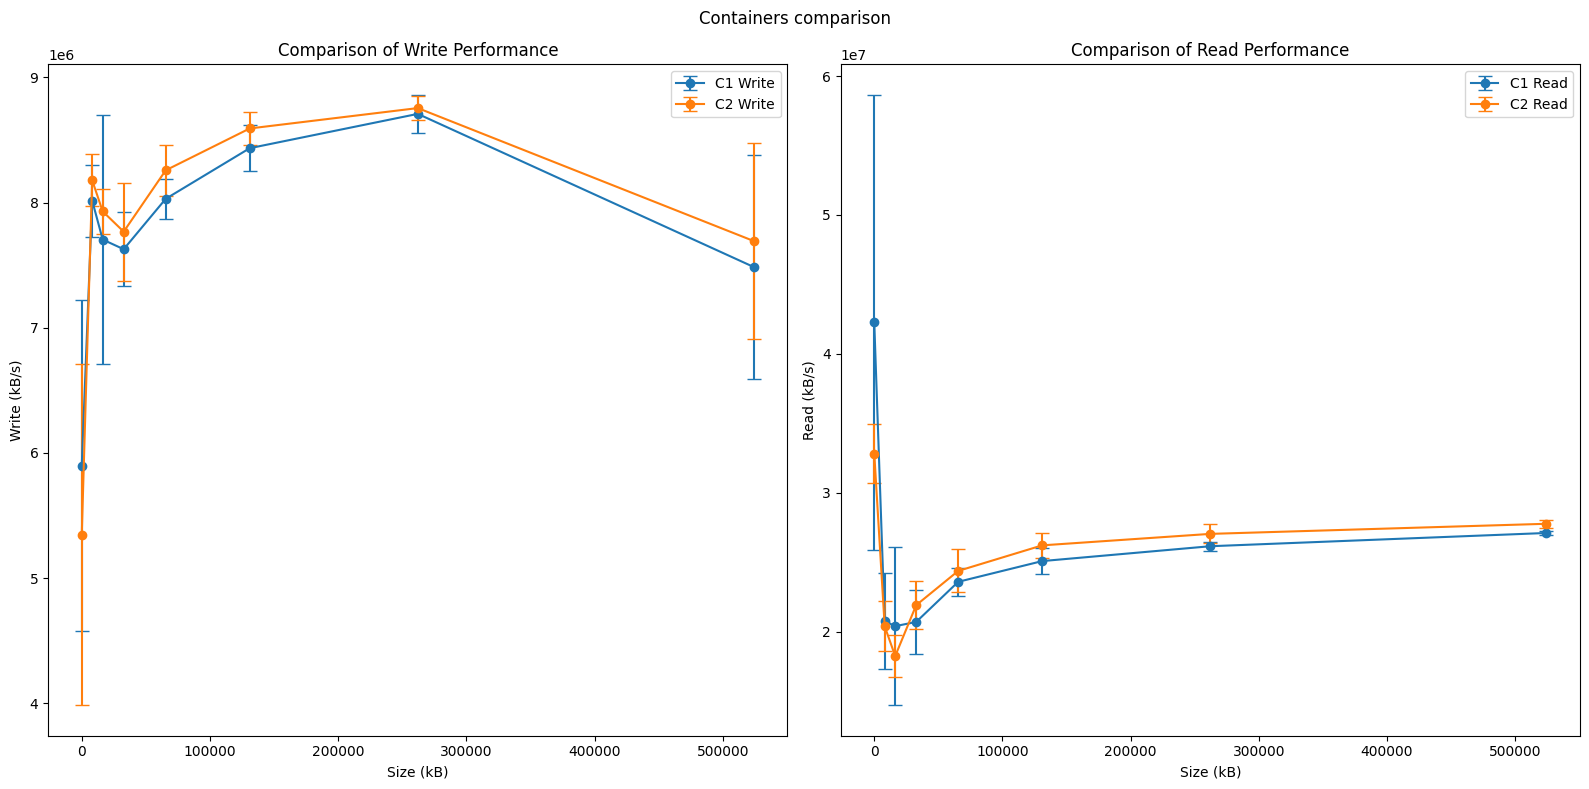

In [10]:
unique_size_n = len(c1_np_df['Size (kB)'].unique())

filtered_c1_df = c1_np_df[~c1_np_df[('Size (kB)', '')].isin([128, 256, 512, 1024, 2048, 4096])]
filtered_c2_df = c2_np_df[~c2_np_df[('Size (kB)', '')].isin([128, 256, 512, 1024, 2048, 4096])]

best_write_c1 = filtered_c1_df.loc[filtered_c1_df.groupby(['Size (kB)'])[[('Write (kB/s)', 'mean')]].idxmax().values.reshape(len(filtered_c1_df['Size (kB)'].unique()))]
best_read_c1 = filtered_c1_df.loc[filtered_c1_df.groupby(['Size (kB)'])[[('Read (kB/s)', 'mean')]].idxmax().values.reshape(len(filtered_c1_df['Size (kB)'].unique()))]
best_write_c2 = filtered_c2_df.loc[filtered_c2_df.groupby(['Size (kB)'])[[('Write (kB/s)', 'mean')]].idxmax().values.reshape(len(filtered_c2_df['Size (kB)'].unique()))]
best_read_c2 = filtered_c2_df.loc[filtered_c2_df.groupby(['Size (kB)'])[[('Read (kB/s)', 'mean')]].idxmax().values.reshape(len(filtered_c2_df['Size (kB)'].unique()))]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("Containers comparison")

ax1.errorbar(best_write_c1[('Size (kB)', '')], best_write_c1[('Write (kB/s)', 'mean')], yerr=best_write_c1[('Write (kB/s)', 'std')], label='C1 Write', marker='o', capsize=5)
ax1.errorbar(best_write_c2[('Size (kB)', '')], best_write_c2[('Write (kB/s)', 'mean')], yerr=best_write_c2[('Write (kB/s)', 'std')], label='C2 Write', marker='o', capsize=5)
ax1.set_xlabel('Size (kB)')
ax1.set_ylabel('Write (kB/s)')
ax1.set_title('Comparison of Write Performance')
ax1.legend()

ax2.errorbar(best_read_c1[('Size (kB)', '')], best_read_c1[('Read (kB/s)', 'mean')], yerr=best_read_c1[('Read (kB/s)', 'std')], label='C1 Read', marker='o', capsize=5)
ax2.errorbar(best_read_c2[('Size (kB)', '')], best_read_c2[('Read (kB/s)', 'mean')], yerr=best_read_c2[('Read (kB/s)', 'std')], label='C2 Read', marker='o', capsize=5)
ax2.set_xlabel('Size (kB)')
ax2.set_ylabel('Read (kB/s)')
ax2.set_title('Comparison of Read Performance')
ax2.legend()

plt.tight_layout()
plt.show()

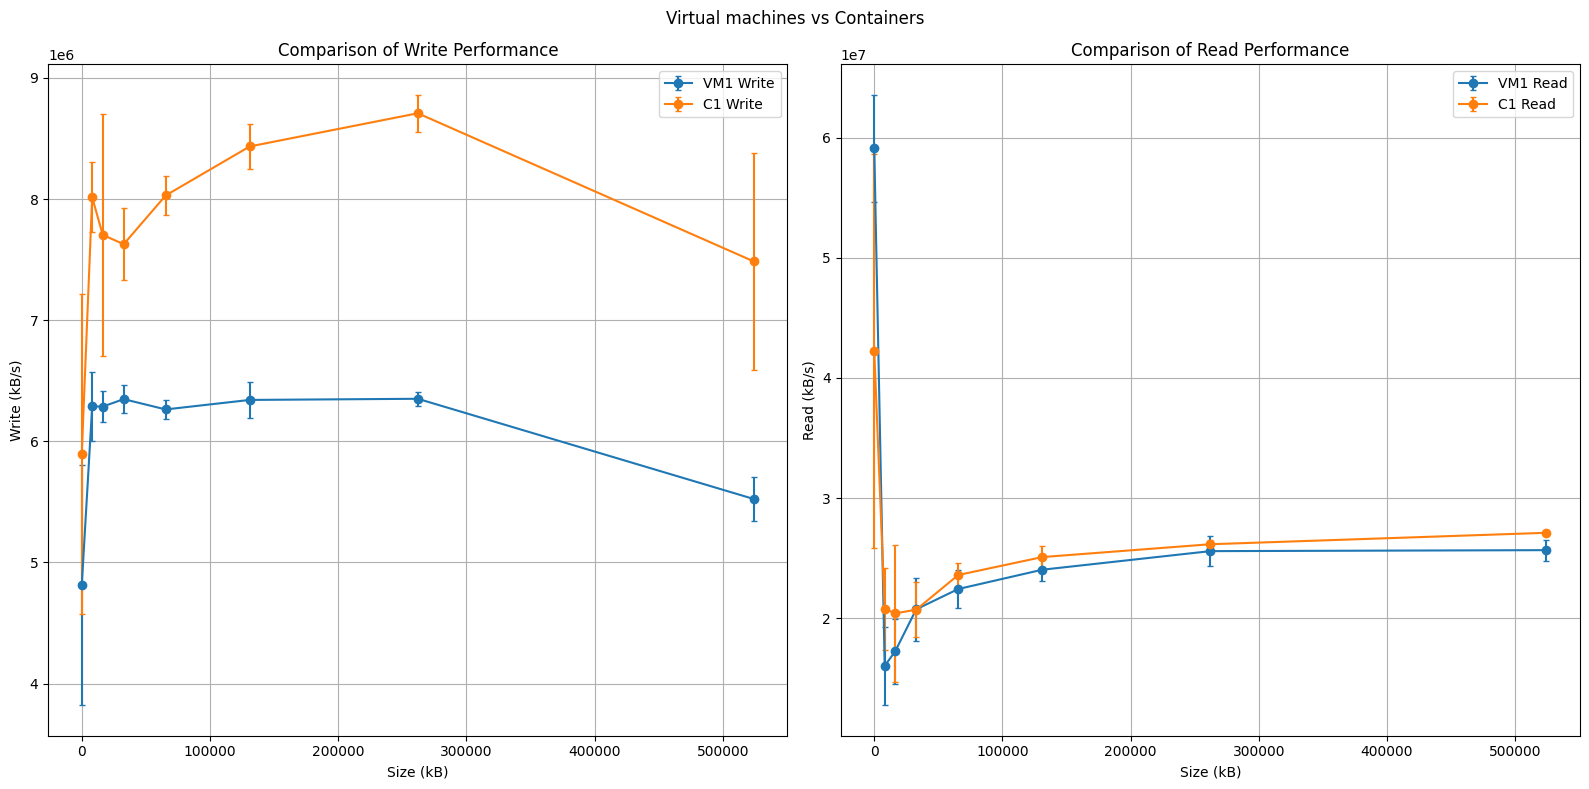

In [17]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("Virtual machines vs Containers")

ax1.errorbar(best_write_vm1[('Size (kB)', '')], best_write_vm1[('Write (kB/s)', 'mean')], yerr=best_write_vm1[('Write (kB/s)', 'std')], label='VM1 Write', marker='o', capsize=2)
ax1.errorbar(best_write_c1[('Size (kB)', '')], best_write_c1[('Write (kB/s)', 'mean')], yerr=best_write_c1[('Write (kB/s)', 'std')], label='C1 Write', marker='o', capsize=2)
ax1.set_xlabel('Size (kB)')
ax1.set_ylabel('Write (kB/s)')
ax1.set_title('Comparison of Write Performance')
ax1.legend()

ax2.errorbar(best_read_vm1[('Size (kB)', '')], best_read_vm1[('Read (kB/s)', 'mean')], yerr=best_read_vm1[('Read (kB/s)', 'std')], label='VM1 Read', marker='o', capsize=2)
ax2.errorbar(best_read_c1[('Size (kB)', '')], best_read_c1[('Read (kB/s)', 'mean')], yerr=best_read_c1[('Read (kB/s)', 'std')], label='C1 Read', marker='o', capsize=2)
ax2.set_xlabel('Size (kB)')
ax2.set_ylabel('Read (kB/s)')
ax2.set_title('Comparison of Read Performance')
ax2.legend()

for ax in [ax1, ax2]:
  ax.grid(True)

plt.tight_layout()
plt.show()

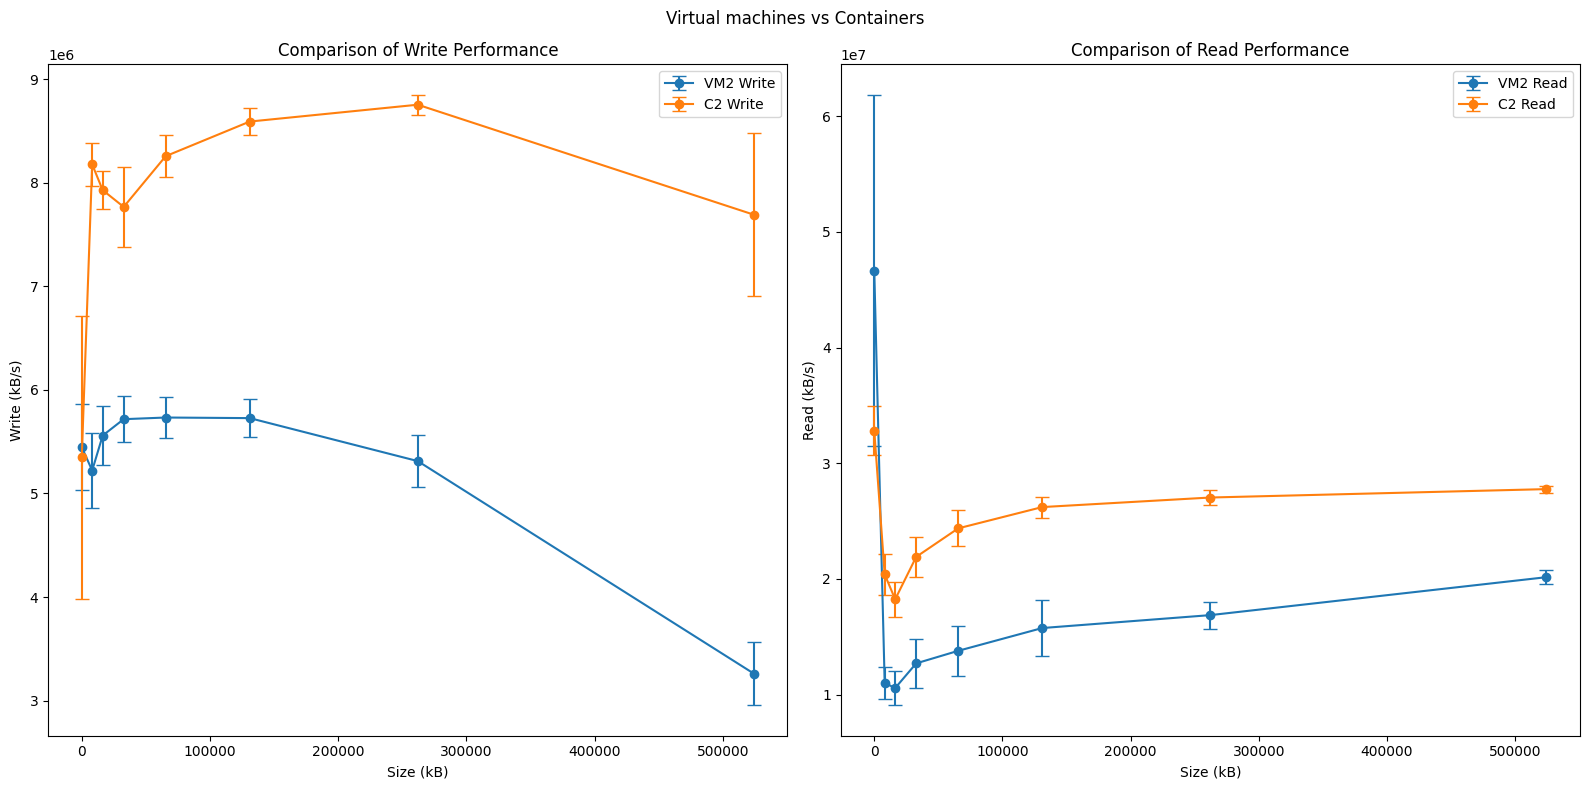

In [12]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("Virtual machines vs Containers")

ax1.errorbar(best_write_vm2[('Size (kB)', '')], best_write_vm2[('Write (kB/s)', 'mean')], yerr=best_write_vm2[('Write (kB/s)', 'std')], label='VM2 Write', marker='o', capsize=5)
ax1.errorbar(best_write_c2[('Size (kB)', '')], best_write_c2[('Write (kB/s)', 'mean')], yerr=best_write_c2[('Write (kB/s)', 'std')], label='C2 Write', marker='o', capsize=5)
ax1.set_xlabel('Size (kB)')
ax1.set_ylabel('Write (kB/s)')
ax1.set_title('Comparison of Write Performance')
ax1.legend()

ax2.errorbar(best_read_vm2[('Size (kB)', '')], best_read_vm2[('Read (kB/s)', 'mean')], yerr=best_read_vm2[('Read (kB/s)', 'std')], label='VM2 Read', marker='o', capsize=5)
ax2.errorbar(best_read_c2[('Size (kB)', '')], best_read_c2[('Read (kB/s)', 'mean')], yerr=best_read_c2[('Read (kB/s)', 'std')], label='C2 Read', marker='o', capsize=5)
ax2.set_xlabel('Size (kB)')
ax2.set_ylabel('Read (kB/s)')
ax2.set_title('Comparison of Read Performance')
ax2.legend()

plt.tight_layout()
plt.show()

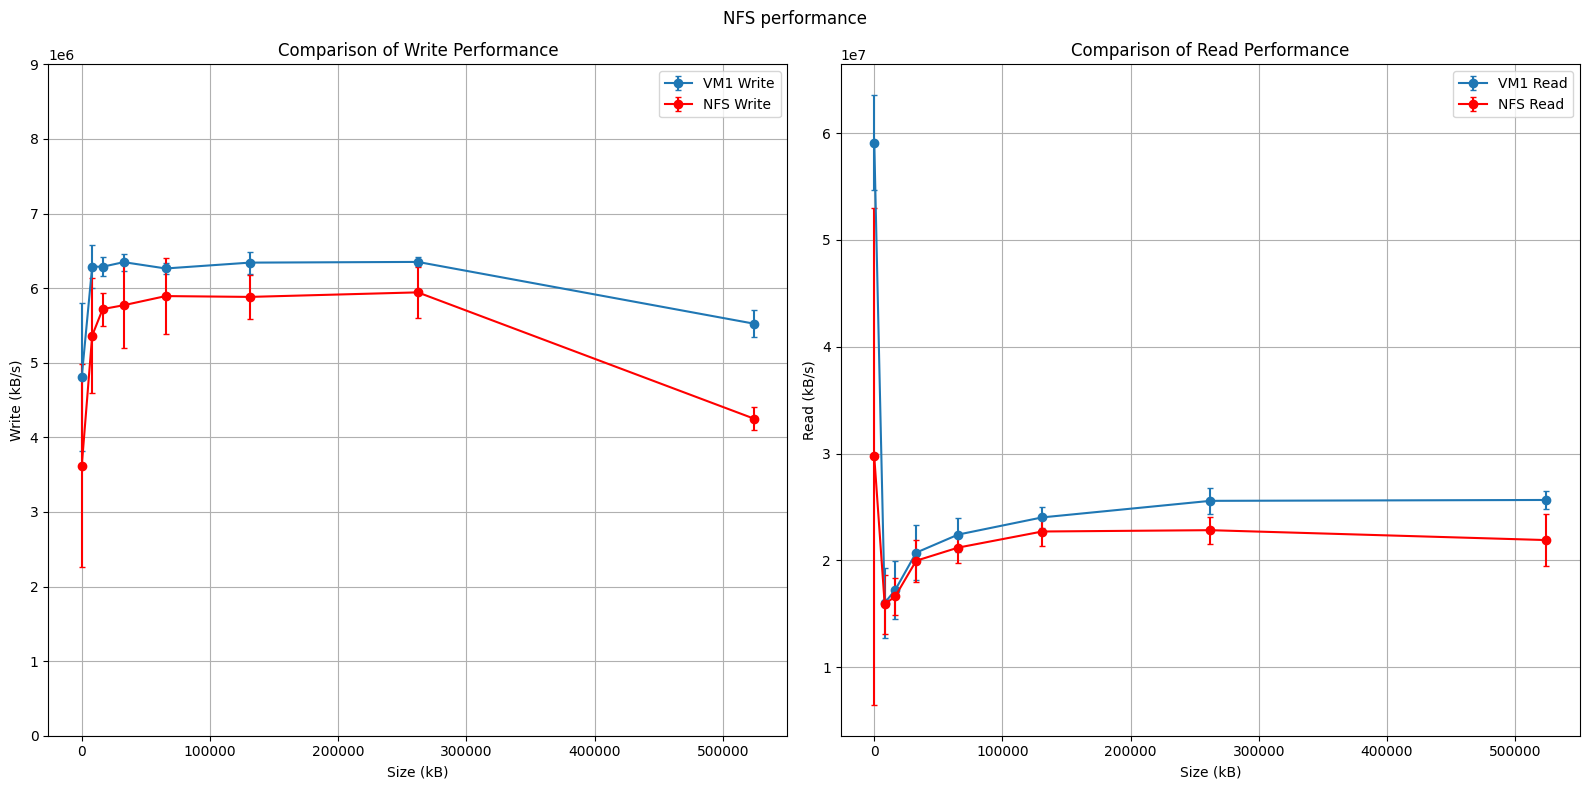

In [27]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("NFS performance")

filtered_vm_nfs_df = vm_nfs_df[~vm_nfs_df[('Size (kB)', '')].isin([128, 256, 512, 1024, 2048, 4096])]
best_write_nfs = filtered_vm_nfs_df.loc[filtered_vm_nfs_df.groupby(['Size (kB)'])[[('Write (kB/s)', 'mean')]].idxmax().values.reshape(len(filtered_vm_nfs_df['Size (kB)'].unique()))]
best_read_nfs = filtered_vm_nfs_df.loc[filtered_vm_nfs_df.groupby(['Size (kB)'])[[('Read (kB/s)', 'mean')]].idxmax().values.reshape(len(filtered_vm_nfs_df['Size (kB)'].unique()))]

ax1.errorbar(best_write_vm1[('Size (kB)', '')], best_write_vm1[('Write (kB/s)', 'mean')], yerr=best_write_vm1[('Write (kB/s)', 'std')], label='VM1 Write', marker='o', capsize=2)
ax1.errorbar(best_write_nfs[('Size (kB)', '')], best_write_nfs[('Write (kB/s)', 'mean')], yerr=best_write_nfs[('Write (kB/s)', 'std')], label='NFS Write', marker='o', capsize=2, color="red")
ax1.set_xlabel('Size (kB)')
ax1.set_ylabel('Write (kB/s)')
ax1.set_title('Comparison of Write Performance')
ax1.legend()

ax2.errorbar(best_read_vm1[('Size (kB)', '')], best_read_vm1[('Read (kB/s)', 'mean')], yerr=best_read_vm1[('Read (kB/s)', 'std')], label='VM1 Read', marker='o', capsize=2)
ax2.errorbar(best_read_nfs[('Size (kB)', '')], best_read_nfs[('Read (kB/s)', 'mean')], yerr=best_read_nfs[('Read (kB/s)', 'std')], label='NFS Read', marker='o', capsize=2, color="red")
ax2.set_xlabel('Size (kB)')
ax2.set_ylabel('Read (kB/s)')
ax2.set_title('Comparison of Read Performance')
ax2.legend()

for ax in [ax1, ax2]:
  ax.grid(True)

ax1.set_ylim(0, 9e6)

plt.tight_layout()
plt.show()